In [7]:
YOUR_API_KEY = 'W1KNO2X49YLY9LTB'

In [43]:
import requests

base_url = 'https://www.alphavantage.co/query?'
params = {'function': 'OVERVIEW',
         'symbol': 'IBM',
         'apikey': YOUR_API_KEY}

response = requests.get(base_url, params=params)

print(response.json())
test = response.json()['Name']
print(test)

{'Symbol': 'IBM', 'AssetType': 'Common Stock', 'Name': 'International Business Machines Corporation', 'Description': "International Business Machines Corporation operates as an integrated solutions and services company worldwide. Its Cloud & Cognitive Software segment offers software for vertical and domain-specific solutions in health, financial services, and Internet of Things (IoT), weather, and security software and services application areas; and customer information control system and storage, and analytics and integration software solutions to support client mission critical on-premise workloads in banking, airline, and retail industries. It also offers middleware and data platform software, including Red Hat, which enables the operation of clients' hybrid multi-cloud environments; and Cloud Paks, WebSphere distributed, and analytics platform software, such as DB2 distributed, information integration, and enterprise content management, as well as IoT, Blockchain and AI/Watson pl

In [49]:
from tqdm import tqdm

def request_stock_price_hist(symbol, token, sample = False):
    if sample == False:
        q_string = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&outputsize=full&apikey={}'
    else:
        q_string = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={}&apikey={}'

    print("Retrieving stock price data from Alpha Vantage (This may take a while)...")
    r = requests.get(q_string.format(symbol, token))
    print("Data has been successfully downloaded...")
    date = []
    colnames = list(range(0, 7))
    df = pd.DataFrame(columns = colnames)
    print("Sorting the retrieved data into a dataframe...")
    for i in tqdm(r.json()['Time Series (Daily)'].keys()):
        date.append(i)
        row = pd.DataFrame.from_dict(r.json()['Time Series (Daily)'][i], orient='index').reset_index().T[1:]
        df = pd.concat([df, row], ignore_index=True)
    df.columns = ["open", "high", "low", "close", "adjusted close", "volume", "dividend amount", "split cf"]
    df['date'] = date
    return df

In [50]:
df = request_stock_price_hist('IBM', 'REPLACE_YOUR_TOKEN')
# df.to_csv('output.csv')

Retrieving stock price data from Alpha Vantage (This may take a while)...


  0%|          | 4/5297 [00:00<02:35, 34.14it/s]

Data has been successfully downloaded...
Sorting the retrieved data into a dataframe...


100%|██████████| 5297/5297 [01:45<00:00, 50.21it/s]


In [51]:
df.head()

,open,high,low,close,adjusted close,volume,dividend amount,split cf,date
0,117.6,118.54,117.07,117.7,117.7,4134455,0.0000,1.0,2020-11-17
1,118.3,118.55,117.12,118.36,118.36,5293385,0.0000,1.0,2020-11-16
2,115.19,117.37,115.01,116.85,116.85,4683512,0.0000,1.0,2020-11-13
3,115.63,116.37,113.48,114.5,114.5,6500799,0.0000,1.0,2020-11-12
4,118.12,118.35,116.22,117.2,117.2,4289601,0.0000,1.0,2020-11-11


In [58]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [60]:
df['high'] = df['high'].astype(float)

In [61]:
df['low'] = df['low'].astype(float)

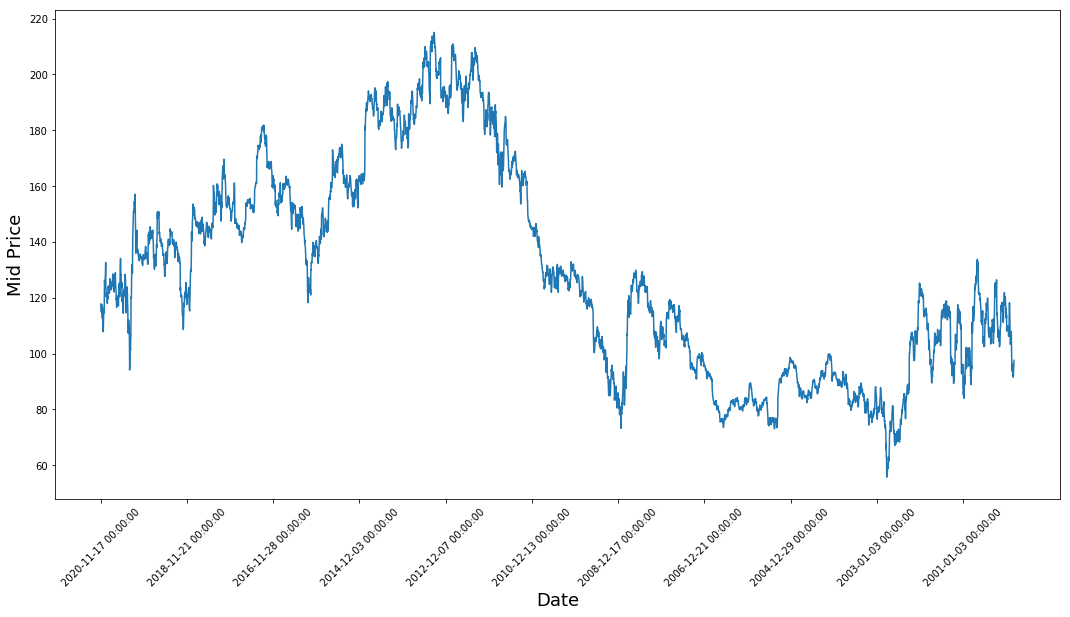

In [63]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [64]:
!pip install html-table-parser-python3

# Publicly Traded Companies

data table acquired from Fintel.io for Publicly Traded Drugs Companies - SIC Code 283

In [68]:
sic_283 = pd.read_csv("SIC_Code_283.csv")

In [70]:
sic_283.head()

,Exchange,Ticker,Country,Name,Market Cap ($M)
0,NASDAQ,ATNF,US,180 Life Sciences Corp.,12
1,OTC,FFNTF,US,4Front Ventures Corp,89
2,NASDAQ,ETNB,US,"89bio, Inc.",520
3,NASDAQ,NMTR,US,"9 Meters Biopharma, Inc.",145
4,NASDAQ,ACIU,US,AC Immune SA,370


In [71]:
sic_283.shape

(1161, 5)

In [72]:
CT_company_name = pd.read_csv("CT_company_name.csv")

In [74]:
CT_company_name.head()


,Unnamed: 0,company_name,count
0,0,GlaxoSmithKline,2667
1,1,Pfizer,2171
2,2,AstraZeneca,1771
3,3,Merck Sharp & Dohme Corp.,1740
4,4,Novartis Pharmaceuticals,1630


In [75]:
print(CT_company_name.shape)

(8488, 3)


In [76]:
del CT_company_name['Unnamed: 0']

In [84]:
 CT_company_name = CT_company_name.rename(columns={'company_name':'Name', 'count':'Trial_count'})

In [85]:
CT_company_name.head()

,Name,Trial_count
0,GlaxoSmithKline,2667
1,Pfizer,2171
2,AstraZeneca,1771
3,Merck Sharp & Dohme Corp.,1740
4,Novartis Pharmaceuticals,1630


In [86]:
 df_new = pd.merge(left=sic_283, right=CT_company_name, left_on='Name', right_on='Name')

In [87]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 219
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Exchange         218 non-null    object
 1   Ticker           220 non-null    object
 2   Country          220 non-null    object
 3   Name             220 non-null    object
 4   Market Cap ($M)  188 non-null    object
 5   Trial_count      220 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 12.0+ KB


In [92]:
pd.set_option('display.max_rows', 500)

In [93]:
df_new.sort_values(by="Trial_count", ascending=False)

,Exchange,Ticker,Country,Name,Market Cap ($M),Trial_count
182,OTC,SNYNF,US,Sanofi,"126,592",1086
183,NASDAQ,SNY,US,Sanofi,"126,893",1086
181,NaN,SANFP,FR,Sanofi,NaN,1086
179,EPA,SANNV,FR,Sanofi,NaN,1086
180,EPA,SAN,FR,Sanofi,NaN,1086
184,NASDAQ,GCVRZ,US,Sanofi,652,1086
139,XCSE,NOVOB,DK,Novo Nordisk A/S,NaN,735
80,EBR,GLPG,BE,Galapagos NV,NaN,85
98,NASDAQ,IONS,US,"Ionis Pharmaceuticals, Inc.","7,086",71
201,NASDAQ,VVUS,US,"VIVUS, Inc.",8,38


In [97]:
for ticker in df_new['Ticker'][:5]: # write a function  that takes ticker name from list and calls stock prices and converts daata and returns graph
    print(ticker)
    

ETNB
NMTR
ACIU
AIM
AMAG


In [98]:
ETNB = request_stock_price_hist('ETNB', 'REPLACE_YOUR_TOKEN')

Retrieving stock price data from Alpha Vantage (This may take a while)...


  6%|▌         | 15/259 [00:00<00:01, 147.77it/s]

Data has been successfully downloaded...
Sorting the retrieved data into a dataframe...


100%|██████████| 259/259 [00:00<00:00, 349.26it/s]


In [99]:
ETNB

,open,high,low,close,adjusted close,volume,dividend amount,split cf,date
0,26.99,27.295,25.595,26.15,26.15,217864,0.0000,1.0,2020-11-18
1,27.88,28.24,26.4,26.67,26.67,106272,0.0000,1.0,2020-11-17
2,26.92,28.25,26.66,28.08,28.08,257809,0.0000,1.0,2020-11-16
3,25.24,27.23,25.02,26.88,26.88,226335,0.0000,1.0,2020-11-13
4,24.94,25.39,24.22,25.08,25.08,351978,0.0000,1.0,2020-11-12
5,25.72,25.72,24.09,24.79,24.79,282626,0.0000,1.0,2020-11-11
6,25.12,25.23,24.3,24.3,24.3,156823,0.0000,1.0,2020-11-10
7,25.13,25.37,24.66,24.99,24.99,123242,0.0000,1.0,2020-11-09
8,24.75,24.99,24.4201,24.68,24.68,65308,0.0000,1.0,2020-11-06
9,24.99,25.45,24.32,24.72,24.72,78382,0.0000,1.0,2020-11-05


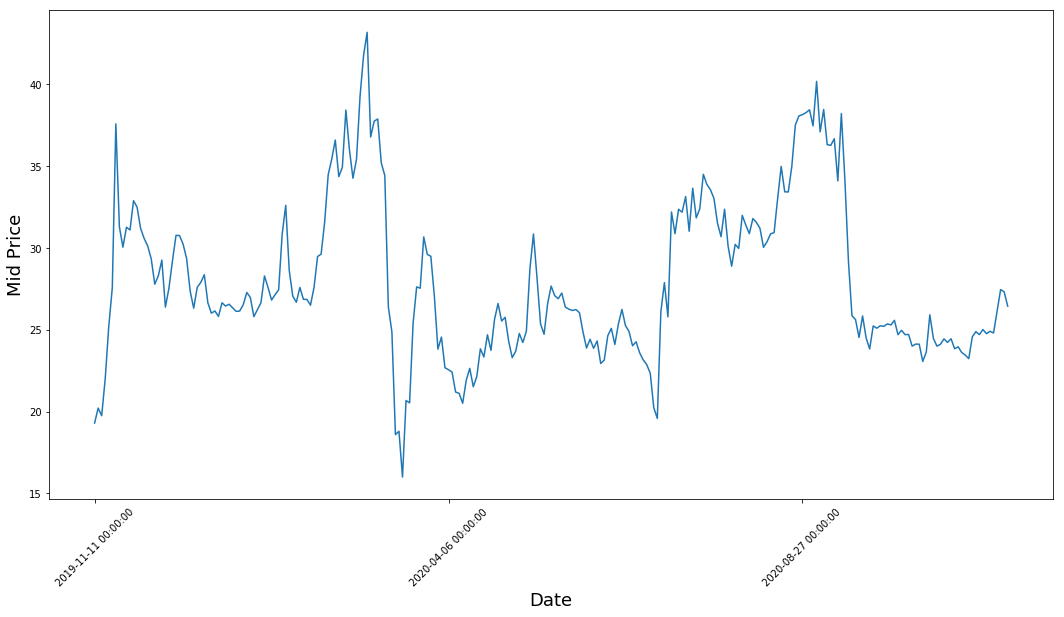

In [104]:
ETNB['date'] = pd.to_datetime(ETNB['date'], format='%Y-%m-%d')
ETNB.sort_values(by="date", ascending=True, inplace=True)
ETNB['high'] = ETNB['high'].astype(float)
ETNB['low'] = ETNB['low'].astype(float)
plt.figure(figsize = (18,9))
plt.plot(range(ETNB.shape[0]),(ETNB['low']+ETNB['high'])/2.0)
plt.xticks(range(0,ETNB.shape[0],100),ETNB['date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [106]:
df_new[df_new['Ticker'] == 'ETNB']

,Exchange,Ticker,Country,Name,Market Cap ($M),Trial_count
0,NASDAQ,ETNB,US,"89bio, Inc.",520,1
